## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('E:/Udemy The Data Science Course 2021 Complete Data Science/35. Advanced Statistical Methods - Practical Example Linear Regression/8.1 1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [4]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)

In [7]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

C:\Users\mehdi\AppData\Local\Temp\ipykernel_12940\216991009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])


<Axes: xlabel='Price', ylabel='Density'>

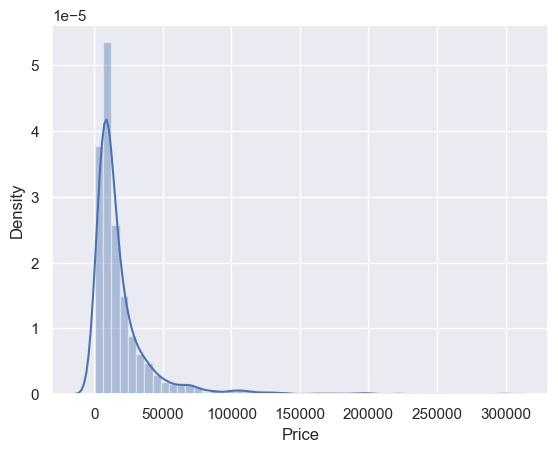

In [8]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [9]:
q = data_no_mv['Price'].quantile(0.97)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3904,3904.000000,3904,3904.000000,3904.000000,3904,3904,3904.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1509,NaN,NaN,1790,3533,NaN
mean,NaN,16082.648299,NaN,168.296363,2.730789,NaN,NaN,2006.108607
std,NaN,14520.658287,NaN,101.330483,5.004271,NaN,NaN,6.611815
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,97.750000,1.800000,NaN,NaN,2002.000000
50%,NaN,11000.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20300.000000,NaN,231.000000,3.000000,NaN,NaN,2011.000000


C:\Users\mehdi\AppData\Local\Temp\ipykernel_12940\2589761964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

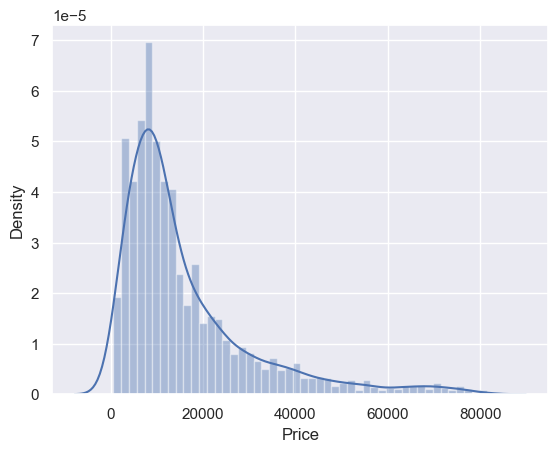

In [10]:
sns.distplot(data_1['Price'])

C:\Users\mehdi\AppData\Local\Temp\ipykernel_12940\534165355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

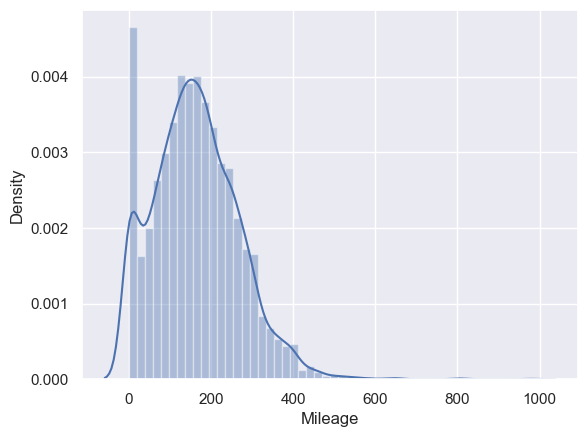

In [11]:
sns.distplot(data_no_mv['Mileage'])

In [12]:
q = data_1['Mileage'].quantile(0.97)
data_2 = data_1[data_1['Mileage']<q]

C:\Users\mehdi\AppData\Local\Temp\ipykernel_12940\1950307955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

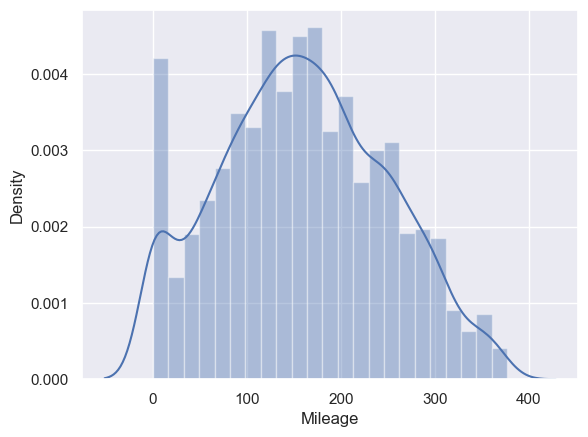

In [13]:
sns.distplot(data_2['Mileage'])

C:\Users\mehdi\AppData\Local\Temp\ipykernel_12940\823394628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

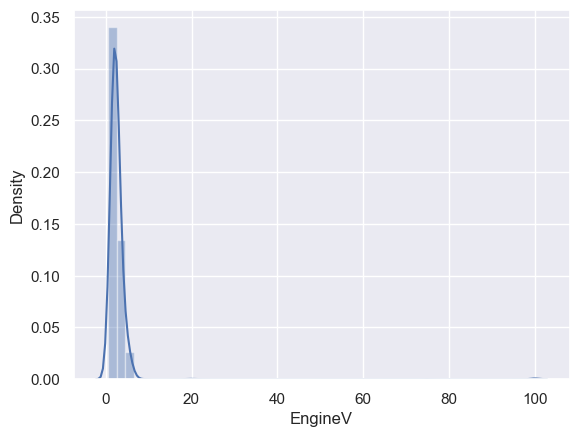

In [14]:
sns.distplot(data_no_mv['EngineV'])

In [15]:
data_3 = data_2[data_2['EngineV']<6.5]

C:\Users\mehdi\AppData\Local\Temp\ipykernel_12940\1902427236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

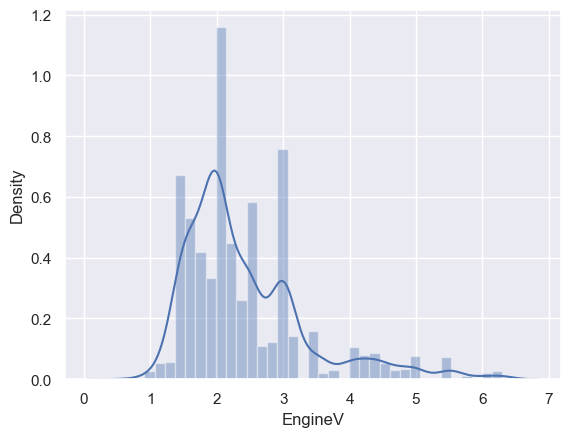

In [16]:
sns.distplot(data_3['EngineV'])

C:\Users\mehdi\AppData\Local\Temp\ipykernel_12940\534082538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Year'])


<Axes: xlabel='Year', ylabel='Density'>

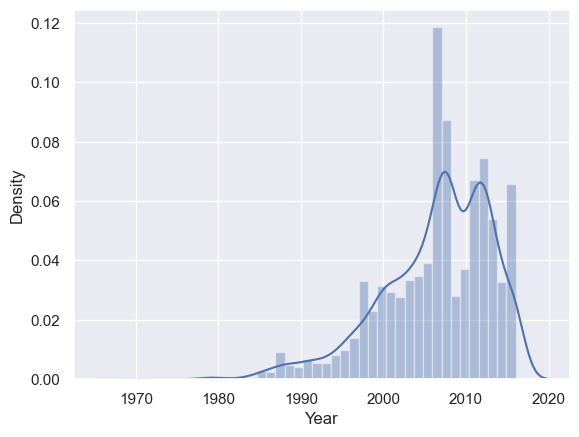

In [17]:
sns.distplot(data_no_mv['Year'])

In [18]:
q = data_3['Year'].quantile(0.03)
data_4 = data_3[data_3['Year']>q]

C:\Users\mehdi\AppData\Local\Temp\ipykernel_12940\2748958191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

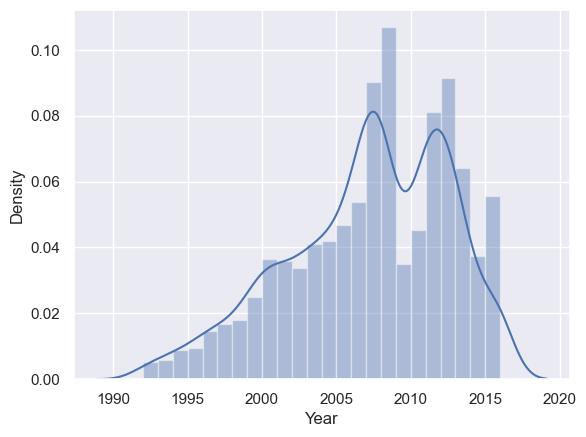

In [19]:
sns.distplot(data_4['Year'])

In [20]:
data_cleaned = data_4.reset_index(drop=True)

In [21]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3642,3642.000000,3642,3642.000000,3642.000000,3642,3642,3642.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,815,NaN,1362,NaN,NaN,1693,3293,NaN
mean,NaN,16874.883885,NaN,157.615321,2.437279,NaN,NaN,2007.065623
std,NaN,14623.412829,NaN,87.349007,0.951763,NaN,NaN,5.423390
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1992.000000
25%,NaN,7500.000000,NaN,95.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11800.000000,NaN,156.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21000.000000,NaN,220.000000,3.000000,NaN,NaN,2011.000000


## Checking the OLS assumptions

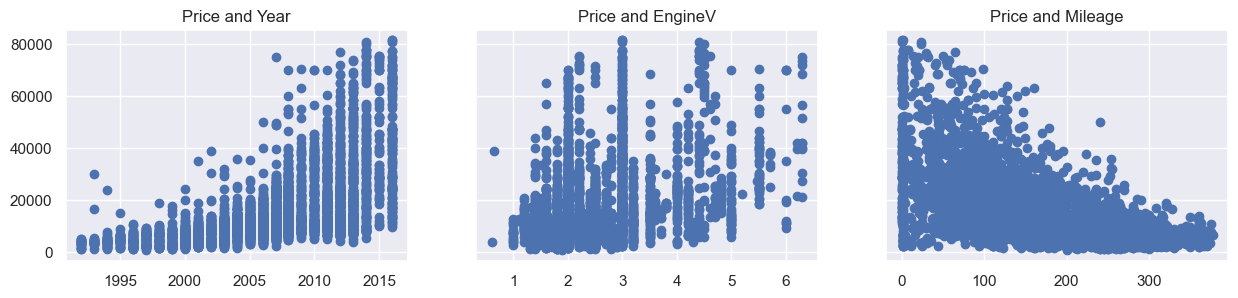

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

C:\Users\mehdi\AppData\Local\Temp\ipykernel_12940\462586877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])


<Axes: xlabel='Price', ylabel='Density'>

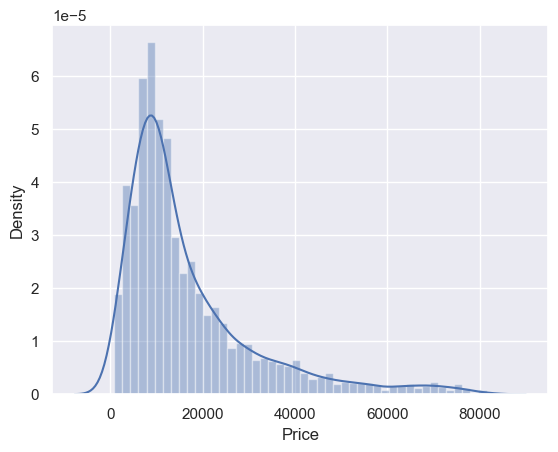

In [23]:
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [24]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
1,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
2,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
3,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
4,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,9.287209
...,...,...,...,...,...,...,...,...,...
3637,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,8.824678
3638,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3639,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3640,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


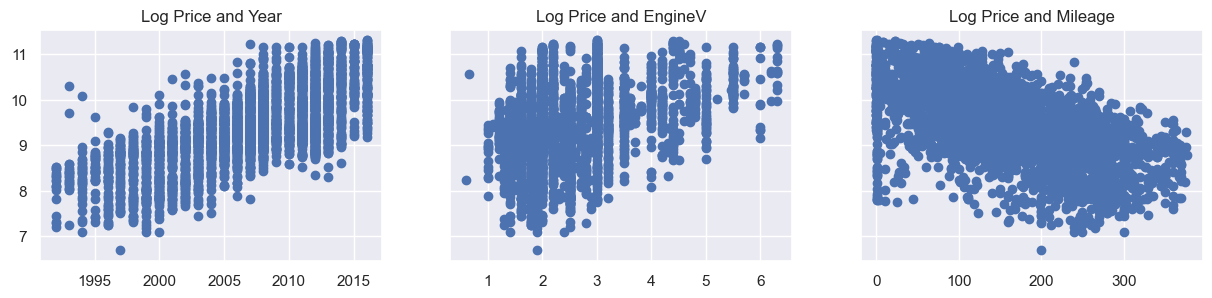

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [26]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [27]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [29]:
vif

,VIF,features
0,4.238400,Mileage
1,10.330578,Year
2,7.570624,EngineV


In [30]:
for i in range (variables.shape[1]):
    print(i)

0
1
2


In [31]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [32]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [33]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,193,1.5,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


### Rearrange

In [34]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [35]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [36]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,9.287209,193,1.5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


## Linear regression model

### Declare the inputs and the targets

In [37]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

### Scale the data

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
scaled_inputs = scaler.transform(inputs)

### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size=0.2, random_state=42)

### Create the regression

In [40]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [41]:
y_hat = reg.predict(x_train)

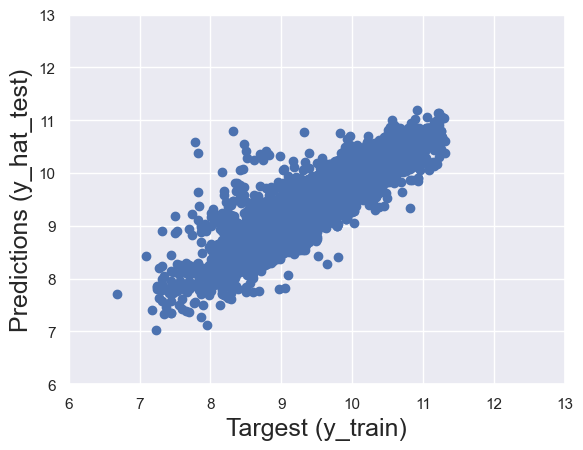

In [42]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targest (y_train)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

C:\Users\mehdi\AppData\Local\Temp\ipykernel_12940\673607322.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


<Axes: xlabel='log_price', ylabel='Density'>

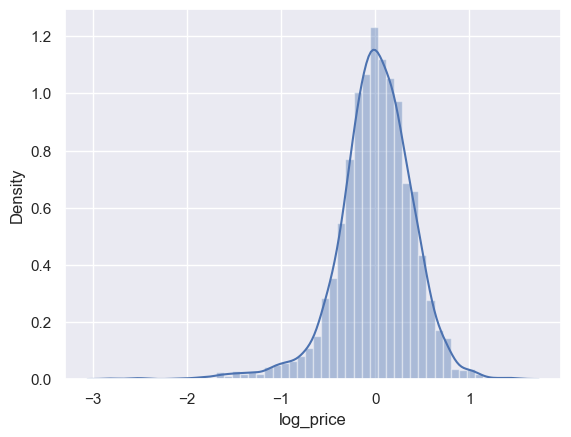

In [43]:
sns.distplot(y_train - y_hat)

In [44]:
reg.score(x_train, y_train)

0.7500867700710918

### Finding the weights and bias

In [45]:
reg.intercept_

9.411353820388282

In [46]:
reg.coef_

array([-0.40456528,  0.20258932,  0.01889757, -0.01711321, -0.14324358,
       -0.18730527, -0.06488461, -0.09052745, -0.14078447, -0.09916064,
       -0.17610188, -0.1230365 , -0.16221709, -0.11000267, -0.0226817 ,
       -0.13268272,  0.32884099])

In [47]:
reg_summary = pd.DataFrame(inputs.columns, columns=["Features"])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.404565
1,EngineV,0.202589
2,Brand_BMW,0.018898
3,Brand_Mercedes-Benz,-0.017113
4,Brand_Mitsubishi,-0.143244
5,Brand_Renault,-0.187305
6,Brand_Toyota,-0.064885
7,Brand_Volkswagen,-0.090527
8,Body_hatch,-0.140784
9,Body_other,-0.099161


In [48]:
inputs.columns.values

array(['Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes'], dtype=object)

## Test

In [49]:
y_hat_test = reg.predict(x_test)

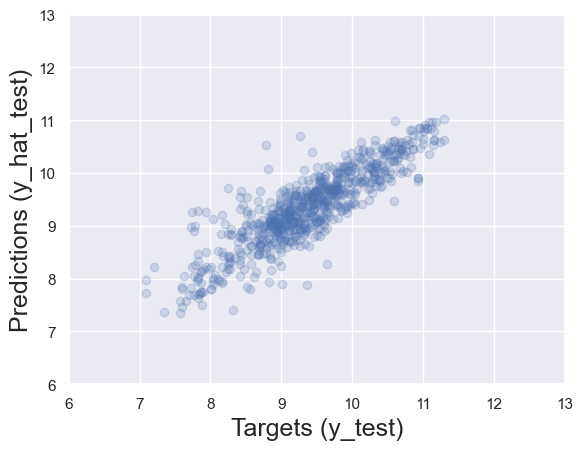

In [50]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel("Targets (y_test)", size=18)
plt.ylabel("Predictions (y_hat_test)", size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

In [51]:
y_test = y_test.reset_index(drop=True)

In [52]:
df_pf = pd.DataFrame(np.exp(reg.predict(x_test)), columns=['Predictions'])
df_pf['Target'] = np.exp(y_test)
#df_pf = pd.DataFrame({'Predictions': np.exp(reg.predict(x_test)), 'Target': np.exp(y_test)}).assign(Target=np.exp(y_test))

In [53]:
df_pf.head(10)

,Predictions,Target
0,2543.798010,2000.0
1,19172.207492,17900.0
2,31613.122666,64999.0
3,7461.454946,11500.0
4,41013.522087,69900.0
5,12091.052523,7900.0
6,10783.547915,9800.0
7,20250.801585,19800.0
8,16442.992737,18900.0
9,4374.380881,6900.0


In [54]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']) * 100

In [55]:
df_pf.head(20)

,Predictions,Target,Residual,Difference%
0,2543.798010,2000.0,-543.798010,27.189900
1,19172.207492,17900.0,-1272.207492,7.107304
2,31613.122666,64999.0,33385.877334,51.363678
3,7461.454946,11500.0,4038.545054,35.117783
4,41013.522087,69900.0,28886.477913,41.325433
5,12091.052523,7900.0,-4191.052523,53.051298
6,10783.547915,9800.0,-983.547915,10.036203
7,20250.801585,19800.0,-450.801585,2.276776
8,16442.992737,18900.0,2457.007263,13.000038
9,4374.380881,6900.0,2525.619119,36.603176


In [56]:
df_pf.describe(include="all")

,Predictions,Target,Residual,Difference%
count,729.000000,729.000000,729.000000,729.000000
mean,14811.171768,16361.698656,1550.526888,32.315460
std,10817.777641,14278.864685,7109.303947,43.304963
min,1553.330014,1199.000000,-33859.410680,0.068998
25%,7597.169248,7300.000000,-1873.915275,11.132801
50%,11663.543301,11500.000000,304.509879,22.346738
75%,18964.720840,19900.000000,3725.309999,38.266732
max,61050.301157,81000.000000,39959.679985,477.226427


In [57]:
pd.options.display.max_rows = 999 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
528,14309.87,14300.00,-9.87,0.07
718,17618.43,17639.47,21.04,0.12
611,40059.33,39999.00,-60.33,0.15
437,40059.33,39999.00,-60.33,0.15
695,9224.89,9200.00,-24.89,0.27
678,7977.21,8000.00,22.79,0.28
53,2191.57,2200.00,8.43,0.38
518,10159.53,10200.00,40.47,0.40
260,7530.90,7500.00,-30.90,0.41
375,3182.37,3200.00,17.63,0.55
